In [1]:
pip install shap

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
# Load the dataset
url = 'https://drive.google.com/uc?id={}'.format('1eFIUsn6RX6rZOmq1v8_-VfOfM9odXGV1')
data = pd.read_csv(url)

# Drop rows with missing values
data = data.dropna()

# Identify categorical variables
categorical_vars = ['SEX', 'MARSTAT', 'REGIONMEPS', 'RELATE', 'RACEA', 'EDUC', 'STUDENT', 'WORKEV', 'FOODSTYN', 'FILEWILL', 'FILETAXFRM', 'HEALTH', 'USUALPL', 'USCMEDTYP', 'USCPRTYP', 'USCPRFAC', 'DELAYMC', 'ANYLMT', 'ADDEV', 'ANGIPECEV', 'ARTHGLUPEV', 'ASTHMAEV', 'CANCEREV', 'CHEARTDIEV', 'CHOLHIGHEV', 'DIABETICEV', 'EMPHYSEMEV', 'HEARTATTEV', 'HEARTCONEV', 'HYPERTENEV', 'STROKEV', 'SMOKENOW', 'ADPALS', 'ADMALS', 'ADPAIN', 'ADRISK', 'ADOVER']
data = pd.get_dummies(data, columns = categorical_vars)

print(data.columns)

Index(['AGE', 'FAMSIZE', 'HISPYN', 'FTOTVAL', 'INCWAGE', 'INCBUS', 'INCUNEMP',
       'INCWKCOM', 'INCINT', 'INCDIVID',
       ...
       'ADRISK_Disagree Somewhat', 'ADRISK_Disagree Strongly',
       'ADRISK_Not Asked', 'ADRISK_Uncertain', 'ADOVER_Agree Somewhat',
       'ADOVER_Agree Strongly', 'ADOVER_Disagree Somewhat',
       'ADOVER_Disagree Strongly', 'ADOVER_Not Asked', 'ADOVER_Uncertain'],
      dtype='object', length=202)


In [4]:
# Split the data into input features (X) and target variable (y)
X = data.drop('HINOTCOV', axis=1)
y = data['HINOTCOV']

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and train the logistic regression model
model = RandomForestClassifier()  # Increase max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8867411750335898


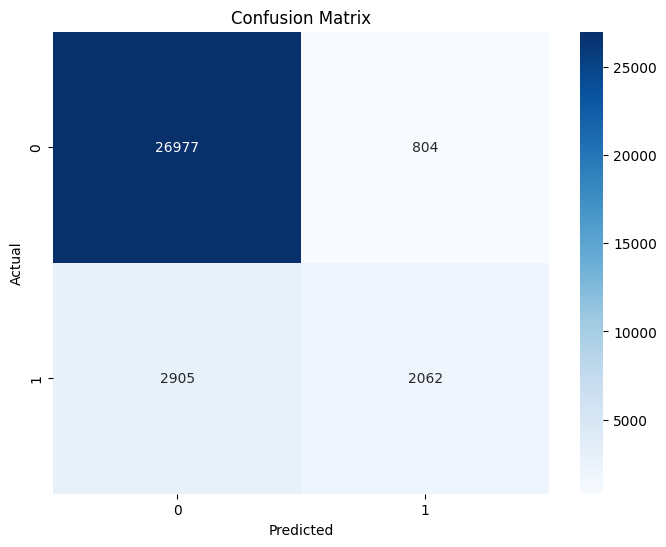

In [6]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Create the SHAP explainer using the logistic regression model and the training set
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)  # this should now return an Explanation object

# Create the SHAP beeswarm plot
shap.plots.beeswarm(shap_values)